In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Train.csv')
df.head()

,session_id,session_number,client_agent,device_details,date,purchased,added_in_cart,checked_out,time_spent
0,57f879e70d3c5fc2a98102d64c9fd84e,715,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2020-01-22,1,0,0,236.886
1,a5442b0c7c33d0a811e7661e556b2de8,55,Product/8.0 iPhone/8.1.3,iPhone - iOS,2020-02-27,1,0,0,1277.455
2,305cb1486ed8610c00b37007926cb2c4,11,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_2 like ...,iPhone - MobileWeb,2019-08-01,0,0,0,21.704
3,f2c1ecc9993f0071df91ba178450498c,2794,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Desktop - IE,2019-12-30,0,1,0,455.201
4,e460830ae295e55d2216ebdc761ab9a6,3674,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_1 like ...,iPhone - Web,2019-09-10,0,0,0,1164.877


In [3]:
df['session_id'].nunique()

5429

In [4]:
df['session_number'].nunique()

610

In [5]:
df.corr()

,session_number,purchased,added_in_cart,checked_out,time_spent
session_number,1.000000,-0.213733,0.003013,-0.054500,0.078437
purchased,-0.213733,1.000000,0.045022,0.168513,0.200762
added_in_cart,0.003013,0.045022,1.000000,0.215754,0.209807
checked_out,-0.054500,0.168513,0.215754,1.000000,0.157765
time_spent,0.078437,0.200762,0.209807,0.157765,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5429 entries, 0 to 5428
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   session_id      5429 non-null   object 
 1   session_number  5429 non-null   int64  
 2   client_agent    5269 non-null   object 
 3   device_details  5429 non-null   object 
 4   date            5429 non-null   object 
 5   purchased       5429 non-null   int64  
 6   added_in_cart   5429 non-null   int64  
 7   checked_out     5429 non-null   int64  
 8   time_spent      5429 non-null   float64
dtypes: float64(1), int64(4), object(4)
memory usage: 381.9+ KB


In [7]:
df['date_parsed']=pd.to_datetime(df['date'], format="%Y-%m-%d")
df['date_parsed']

0      2020-01-22
1      2020-02-27
2      2019-08-01
3      2019-12-30
4      2019-09-10
          ...    
5424   2019-11-20
5425   2019-09-26
5426   2019-08-13
5427   2019-06-18
5428   2019-10-21
Name: date_parsed, Length: 5429, dtype: datetime64[ns]

In [8]:
df.head()

,session_id,session_number,client_agent,device_details,date,purchased,added_in_cart,checked_out,time_spent,date_parsed
0,57f879e70d3c5fc2a98102d64c9fd84e,715,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2020-01-22,1,0,0,236.886,2020-01-22
1,a5442b0c7c33d0a811e7661e556b2de8,55,Product/8.0 iPhone/8.1.3,iPhone - iOS,2020-02-27,1,0,0,1277.455,2020-02-27
2,305cb1486ed8610c00b37007926cb2c4,11,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_2 like ...,iPhone - MobileWeb,2019-08-01,0,0,0,21.704,2019-08-01
3,f2c1ecc9993f0071df91ba178450498c,2794,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Desktop - IE,2019-12-30,0,1,0,455.201,2019-12-30
4,e460830ae295e55d2216ebdc761ab9a6,3674,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_1 like ...,iPhone - Web,2019-09-10,0,0,0,1164.877,2019-09-10


In [9]:
df.drop('date', axis=1, inplace=True)

In [10]:
df.head()

,session_id,session_number,client_agent,device_details,purchased,added_in_cart,checked_out,time_spent,date_parsed
0,57f879e70d3c5fc2a98102d64c9fd84e,715,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,1,0,0,236.886,2020-01-22
1,a5442b0c7c33d0a811e7661e556b2de8,55,Product/8.0 iPhone/8.1.3,iPhone - iOS,1,0,0,1277.455,2020-02-27
2,305cb1486ed8610c00b37007926cb2c4,11,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_2 like ...,iPhone - MobileWeb,0,0,0,21.704,2019-08-01
3,f2c1ecc9993f0071df91ba178450498c,2794,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Desktop - IE,0,1,0,455.201,2019-12-30
4,e460830ae295e55d2216ebdc761ab9a6,3674,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_1 like ...,iPhone - Web,0,0,0,1164.877,2019-09-10


In [11]:
df.shape

(5429, 9)

In [12]:
df.isnull().sum()

session_id          0
session_number      0
client_agent      160
device_details      0
purchased           0
added_in_cart       0
checked_out         0
time_spent          0
date_parsed         0
dtype: int64

In [13]:
total_cells_df=np.product(df.shape)
total_missing_df=(df.isnull().sum()).sum()
(total_missing_df/total_cells_df) * 100

0.32745952804895523

In [14]:
df['client_agent'].value_counts()

Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_1 like Mac OS X) AppleWebKit/537.51.2 (KHTML, like Gecko) Mobile/11D201                              209
Mozilla/5.0 (Windows NT 6.3; WOW64; Trident/7.0; Touch; rv:11.0) like Gecko                                                                 163
Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7.0; rv:11.0) like Gecko                                                                        148
Product/4.2.0 iPhone/7.1.1                                                                                                                  146
Product/4.7.0 iPhone/8.1.2                                                                                                                  144
                                                                                                                                           ... 
Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/40.0.2214.115 Safari/537.36                                  

In [15]:
df.dropna()

,session_id,session_number,client_agent,device_details,purchased,added_in_cart,checked_out,time_spent,date_parsed
0,57f879e70d3c5fc2a98102d64c9fd84e,715,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,1,0,0,236.886,2020-01-22
1,a5442b0c7c33d0a811e7661e556b2de8,55,Product/8.0 iPhone/8.1.3,iPhone - iOS,1,0,0,1277.455,2020-02-27
2,305cb1486ed8610c00b37007926cb2c4,11,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_2 like ...,iPhone - MobileWeb,0,0,0,21.704,2019-08-01
3,f2c1ecc9993f0071df91ba178450498c,2794,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Desktop - IE,0,1,0,455.201,2019-12-30
4,e460830ae295e55d2216ebdc761ab9a6,3674,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_1 like ...,iPhone - Web,0,0,0,1164.877,2019-09-10
...,...,...,...,...,...,...,...,...,...
5423,5bf3de222cfb2c4d03ece05c29f785c8,11,Product/160418 Android/4.4.2 Device/samsung_SH...,Android Phone - Android,1,1,0,2710.524,2020-04-06
5424,b6aa30da97fa3c95989c47ccf5ab4e9f,627,Mozilla/5.0 (iPhone; CPU iPhone OS 8_1 like Ma...,iPhone - Web,0,0,0,20.601,2019-11-20
5425,58b62e9fa867d622662b8a4096fdc3f0,6710,Product/4.2.2 iPhone/7.1.1,iPhone - iOS,0,0,0,1537.666,2019-09-26
5426,109f7f9b8384e46fc88f580b328298e8,198,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4)...,Desktop - Chrome,0,0,0,22.711,2019-08-13


In [16]:
df['year']=df['date_parsed'].dt.year
df['year']

0       2020
1       2020
2       2019
3       2019
4       2019
        ... 
5424    2019
5425    2019
5426    2019
5427    2019
5428    2019
Name: year, Length: 5429, dtype: int64

In [17]:
df['month']=df['date_parsed'].dt.month
df['month']

0        1
1        2
2        8
3       12
4        9
        ..
5424    11
5425     9
5426     8
5427     6
5428    10
Name: month, Length: 5429, dtype: int64

In [18]:
df['date_parsed'].dt.week

C:\Users\KRISH\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.


0        4
1        9
2       31
3        1
4       37
        ..
5424    47
5425    39
5426    33
5427    25
5428    43
Name: date_parsed, Length: 5429, dtype: int64

In [19]:
df['month']=pd.to_datetime(df['month'], format='%m').dt.month_name().str.slice(stop=3)


In [20]:
df['month']

0       Jan
1       Feb
2       Aug
3       Dec
4       Sep
       ... 
5424    Nov
5425    Sep
5426    Aug
5427    Jun
5428    Oct
Name: month, Length: 5429, dtype: object

In [21]:
df.head()

,session_id,session_number,client_agent,device_details,purchased,added_in_cart,checked_out,time_spent,date_parsed,year,month
0,57f879e70d3c5fc2a98102d64c9fd84e,715,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,1,0,0,236.886,2020-01-22,2020,Jan
1,a5442b0c7c33d0a811e7661e556b2de8,55,Product/8.0 iPhone/8.1.3,iPhone - iOS,1,0,0,1277.455,2020-02-27,2020,Feb
2,305cb1486ed8610c00b37007926cb2c4,11,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_2 like ...,iPhone - MobileWeb,0,0,0,21.704,2019-08-01,2019,Aug
3,f2c1ecc9993f0071df91ba178450498c,2794,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Desktop - IE,0,1,0,455.201,2019-12-30,2019,Dec
4,e460830ae295e55d2216ebdc761ab9a6,3674,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_1 like ...,iPhone - Web,0,0,0,1164.877,2019-09-10,2019,Sep


In [22]:
df.groupby('year').mean()['time_spent']

year
2019    695.173431
2020    575.850580
Name: time_spent, dtype: float64

In [23]:
df.groupby(['year','month']).mean()['time_spent'].sort_values(ascending=False)

year  month
2019  Sep      1224.655159
2020  Apr       756.935554
2019  Jul       697.198777
      May       657.216541
      Nov       609.863559
      Jun       604.254804
2020  Feb       588.514971
      Mar       555.706827
      Jan       550.825790
2019  Oct       500.183493
      Aug       495.372718
      Dec       484.079435
Name: time_spent, dtype: float64

In [24]:
client_agent_group=df.groupby(['client_agent']).mean()['time_spent']
client_agent_group

client_agent
-unknown-                                                                                                                                                                                         112.291000
Dalvik/2.1.0 (Linux; U; Android 5.0; LG-D855 Build/LRX21R.A1422018487)                                                                                                                             23.734000
Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 6.0; Trident/5.0; SLCC1; .NET CLR 2.0.50727; .NET CLR 3.5.30729; .NET CLR 3.0.30729; .NET4.0C; .NET4.0E)                                             51.591500
Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 6.1; WOW64; SLCC2; .NET CLR 2.0.50727; .NET CLR 3.5.30729; .NET CLR 3.0.30729; Media Center PC 6.0; MS-RTC LM 8; .NET4.0C; .NET4.0E; InfoPath.3)     19.647000
Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 6.1; WOW64; Trident/6.0; SLCC2; .NET CLR 2.0.50727; .NET CLR 3.5.30729; .NET CLR 3.0.30729; Media Center PC 6.0; .NET4.0C

In [25]:
client_agent_group=client_agent_group.astype('int')
client_agent_group.dtype

dtype('int32')

In [26]:
client_agent_group.sort_values(ascending=False)

client_agent
Mozilla/5.0 (Windows NT 6.3; WOW64; rv:25.0) Gecko/20100101 Firefox/25.0                                                                                                                                                                                             9664
Mozilla/5.0 (Macintosh; Intel Mac OS X 10.7; rv:30.0) Gecko/20100101 Firefox/30.0                                                                                                                                                                                    6332
Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2272.16 Safari/537.36                                                                                                                                             5313
Product/4.1.1 iPhone/7.1                                                                                                                                                                     

In [27]:
client_device_details=df.groupby(['device_details']).mean()['time_spent']
client_device_details

device_details
Android Phone - Android        883.049902
Android Phone - MobileWeb      365.732944
Android Phone - Web            269.534570
Android Tablet - Android       821.052000
Android Tablet - MobileWeb     332.864000
Android Tablet - Web           444.420542
Desktop - Chrome               660.397282
Desktop - Firefox             1091.358081
Desktop - IE                   716.524606
Desktop - Safari               855.816930
Other - Other                  176.338789
Unknown - MobileWeb            201.252483
iPad - Web                     711.239830
iPad - iOS                     945.288727
iPhone - MobileWeb             255.648924
iPhone - Web                   538.567947
iPhone - iOS                   754.639169
Name: time_spent, dtype: float64

In [28]:
New=df['device_details'].str.split(" - ", expand=True)
df["Device"]=New[0]
df["OS/Browser"]=New[1]

In [29]:
df.head()

,session_id,session_number,client_agent,device_details,purchased,added_in_cart,checked_out,time_spent,date_parsed,year,month,Device,OS/Browser
0,57f879e70d3c5fc2a98102d64c9fd84e,715,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,1,0,0,236.886,2020-01-22,2020,Jan,Desktop,Chrome
1,a5442b0c7c33d0a811e7661e556b2de8,55,Product/8.0 iPhone/8.1.3,iPhone - iOS,1,0,0,1277.455,2020-02-27,2020,Feb,iPhone,iOS
2,305cb1486ed8610c00b37007926cb2c4,11,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_2 like ...,iPhone - MobileWeb,0,0,0,21.704,2019-08-01,2019,Aug,iPhone,MobileWeb
3,f2c1ecc9993f0071df91ba178450498c,2794,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Desktop - IE,0,1,0,455.201,2019-12-30,2019,Dec,Desktop,IE
4,e460830ae295e55d2216ebdc761ab9a6,3674,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_1 like ...,iPhone - Web,0,0,0,1164.877,2019-09-10,2019,Sep,iPhone,Web


In [30]:
df.drop('device_details', axis=1, inplace=True)

In [31]:
df.head()

,session_id,session_number,client_agent,purchased,added_in_cart,checked_out,time_spent,date_parsed,year,month,Device,OS/Browser
0,57f879e70d3c5fc2a98102d64c9fd84e,715,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,1,0,0,236.886,2020-01-22,2020,Jan,Desktop,Chrome
1,a5442b0c7c33d0a811e7661e556b2de8,55,Product/8.0 iPhone/8.1.3,1,0,0,1277.455,2020-02-27,2020,Feb,iPhone,iOS
2,305cb1486ed8610c00b37007926cb2c4,11,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_2 like ...,0,0,0,21.704,2019-08-01,2019,Aug,iPhone,MobileWeb
3,f2c1ecc9993f0071df91ba178450498c,2794,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,0,1,0,455.201,2019-12-30,2019,Dec,Desktop,IE
4,e460830ae295e55d2216ebdc761ab9a6,3674,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_1 like ...,0,0,0,1164.877,2019-09-10,2019,Sep,iPhone,Web


In [32]:
df.shape

(5429, 12)

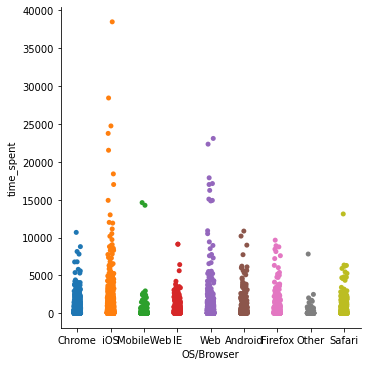

In [33]:
sns.catplot(x='OS/Browser', y='time_spent', data=df)

C:\Users\KRISH\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 94.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\KRISH\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 95.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\KRISH\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 87.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\KRISH\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 84.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\KRISH\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 85.5% of the points

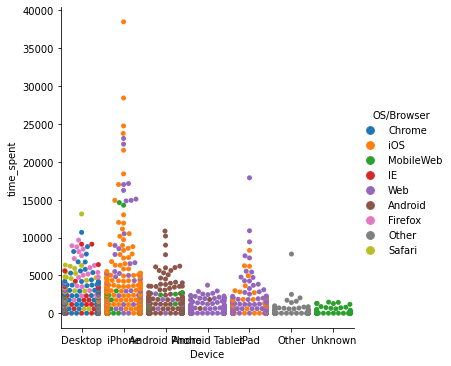

In [34]:
sns.catplot(x='Device', y='time_spent', hue='OS/Browser', kind='swarm', data=df)

In [35]:
#df['device_details']=df['device_details'].replace("Android Phone - Android", "AP_A")
#df['device_details']=df['device_details'].replace("Android Phone - MobileWeb", "AP_MW")
#df['device_details']=df['device_details'].replace("Android Phone - Web", "AP_W")
#df['device_details']=df['device_details'].replace("Android Tablet - Android", "AT_A")
#df['device_details']=df['device_details'].replace("Android Tablet - MobileWeb", "AT_MW")
#df['device_details']=df['device_details'].replace("Android Tablet - Web", "AT_W")
#df['device_details']=df['device_details'].replace("Desktop - Chrome", "D_C")
#df['device_details']=df['device_details'].replace("Desktop - Firefox", "D_FF")
#df['device_details']=df['device_details'].replace("Desktop - IE", "D_IE")
#df['device_details']=df['device_details'].replace("Desktop - Safari", "D_S")
#df['device_details']=df['device_details'].replace("Other - Other", "O_O")
#df['device_details']=df['device_details'].replace("Unknown - MobileWeb", "U_MW")
#df['dveice_details']=df['device_details'].replace("iPad - Web", "Ip_W")
#df['device_details']=df['device_details'].replace("iPad - iOS", "Ip_IOS")
#df['device_details']=df['device_details'].replace("iPhone - MobileWeb", "IPh_MW")
#df['device_details']=df['device_details'].replace("iPhone - Web", "IPh_W")
#df['device_details']=df['device_details'].replace("iPhone - iOS", "Iph_IOS")

In [36]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [37]:
m=ols('time_spent ~ session_number', df).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:             time_spent   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     33.60
Date:                Wed, 03 Feb 2021   Prob (F-statistic):           7.17e-09
Time:                        10:00:10   Log-Likelihood:                -48113.
No. Observations:                5429   AIC:                         9.623e+04
Df Residuals:                    5427   BIC:                         9.624e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        562.7972     28.943     19.

In [38]:
df.columns

Index(['session_id', 'session_number', 'client_agent', 'purchased',
       'added_in_cart', 'checked_out', 'time_spent', 'date_parsed', 'year',
       'month', 'Device', 'OS/Browser'],
      dtype='object')

In [39]:
m1=ols('time_spent ~ session_number + purchased + added_in_cart + Device', df).fit()
print(m1.summary())

                            OLS Regression Results                            
Dep. Variable:             time_spent   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     65.72
Date:                Wed, 03 Feb 2021   Prob (F-statistic):          3.36e-115
Time:                        10:00:10   Log-Likelihood:                -47848.
No. Observations:                5429   AIC:                         9.572e+04
Df Residuals:                    5419   BIC:                         9.578e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
x=df[['session_number', 'purchased',
       'added_in_cart', 'checked_out', 'time_spent', 'year']]
vif_data=pd.DataFrame()
vif_data['feature']=x.columns
#calculating vif for each feature
vif_data['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(vif_data)

          feature       VIF
0  session_number  1.661496
1       purchased  1.334848
2   added_in_cart  1.295579
3     checked_out  1.106573
4      time_spent  1.282135
5            year  2.110473


In [41]:
# Decision Tree regression model execution
from sklearn.ensemble import RandomForestRegressor
df.head()

,session_id,session_number,client_agent,purchased,added_in_cart,checked_out,time_spent,date_parsed,year,month,Device,OS/Browser
0,57f879e70d3c5fc2a98102d64c9fd84e,715,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,1,0,0,236.886,2020-01-22,2020,Jan,Desktop,Chrome
1,a5442b0c7c33d0a811e7661e556b2de8,55,Product/8.0 iPhone/8.1.3,1,0,0,1277.455,2020-02-27,2020,Feb,iPhone,iOS
2,305cb1486ed8610c00b37007926cb2c4,11,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_2 like ...,0,0,0,21.704,2019-08-01,2019,Aug,iPhone,MobileWeb
3,f2c1ecc9993f0071df91ba178450498c,2794,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,0,1,0,455.201,2019-12-30,2019,Dec,Desktop,IE
4,e460830ae295e55d2216ebdc761ab9a6,3674,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_1 like ...,0,0,0,1164.877,2019-09-10,2019,Sep,iPhone,Web


In [42]:
df=df.drop(['session_id','client_agent', 'date', 'date_parsed','session_number'])

KeyError: "['session_id' 'client_agent' 'date' 'date_parsed' 'session_number'] not found in axis"

In [ ]:
df.head()

In [43]:
df=df.drop('session_number', axis=1)
df.head()

,session_id,client_agent,purchased,added_in_cart,checked_out,time_spent,date_parsed,year,month,Device,OS/Browser
0,57f879e70d3c5fc2a98102d64c9fd84e,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,1,0,0,236.886,2020-01-22,2020,Jan,Desktop,Chrome
1,a5442b0c7c33d0a811e7661e556b2de8,Product/8.0 iPhone/8.1.3,1,0,0,1277.455,2020-02-27,2020,Feb,iPhone,iOS
2,305cb1486ed8610c00b37007926cb2c4,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_2 like ...,0,0,0,21.704,2019-08-01,2019,Aug,iPhone,MobileWeb
3,f2c1ecc9993f0071df91ba178450498c,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,0,1,0,455.201,2019-12-30,2019,Dec,Desktop,IE
4,e460830ae295e55d2216ebdc761ab9a6,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_1 like ...,0,0,0,1164.877,2019-09-10,2019,Sep,iPhone,Web


In [45]:
df=df.drop('session_id', axis=1)

In [46]:
df.head()

,client_agent,purchased,added_in_cart,checked_out,time_spent,date_parsed,year,month,Device,OS/Browser
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,1,0,0,236.886,2020-01-22,2020,Jan,Desktop,Chrome
1,Product/8.0 iPhone/8.1.3,1,0,0,1277.455,2020-02-27,2020,Feb,iPhone,iOS
2,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_2 like ...,0,0,0,21.704,2019-08-01,2019,Aug,iPhone,MobileWeb
3,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,0,1,0,455.201,2019-12-30,2019,Dec,Desktop,IE
4,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_1 like ...,0,0,0,1164.877,2019-09-10,2019,Sep,iPhone,Web


In [47]:
df=df.drop('client_agent', axis=1)

In [48]:
df.head()

,purchased,added_in_cart,checked_out,time_spent,date_parsed,year,month,Device,OS/Browser
0,1,0,0,236.886,2020-01-22,2020,Jan,Desktop,Chrome
1,1,0,0,1277.455,2020-02-27,2020,Feb,iPhone,iOS
2,0,0,0,21.704,2019-08-01,2019,Aug,iPhone,MobileWeb
3,0,1,0,455.201,2019-12-30,2019,Dec,Desktop,IE
4,0,0,0,1164.877,2019-09-10,2019,Sep,iPhone,Web


In [49]:
df=df.drop("date_parsed", axis=1)

In [50]:
df.head()

,purchased,added_in_cart,checked_out,time_spent,year,month,Device,OS/Browser
0,1,0,0,236.886,2020,Jan,Desktop,Chrome
1,1,0,0,1277.455,2020,Feb,iPhone,iOS
2,0,0,0,21.704,2019,Aug,iPhone,MobileWeb
3,0,1,0,455.201,2019,Dec,Desktop,IE
4,0,0,0,1164.877,2019,Sep,iPhone,Web


In [51]:
#one_hot encode the data using pandas get_dummies
df=pd.get_dummies(df)
df.head()

,purchased,added_in_cart,checked_out,time_spent,year,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,...,Device_iPhone,OS/Browser_Android,OS/Browser_Chrome,OS/Browser_Firefox,OS/Browser_IE,OS/Browser_MobileWeb,OS/Browser_Other,OS/Browser_Safari,OS/Browser_Web,OS/Browser_iOS
0,1,0,0,236.886,2020,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,1,0,0,1277.455,2020,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
2,0,0,0,21.704,2019,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,0,1,0,455.201,2019,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,1164.877,2019,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [52]:
#Selecting response variable and independent variables
labels=np.array(df['time_spent'])

#dropping the features not being used for model building
features=df.drop(['time_spent'], axis=1)

#Saving feature names for the later use
feature_list=list(features.columns)
features=np.array(features)

In [53]:
# importing train_test_split function form Skicit-learn module
from sklearn.model_selection import train_test_split
# Split the data into training and testing data

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.25, random_state=42)

In [54]:
print("Training features shape: ", train_features.shape)
print("Traing labels shape: ", train_labels.shape)
print("Testing features shape", test_features.shape)
print("Testing labels shape", test_labels.shape)

Training features shape:  (4071, 32)
Traing labels shape:  (4071,)
Testing features shape (1358, 32)
Testing labels shape (1358,)


In [55]:
test_labels.min()

14.4

In [ ]:
from sklearn.preprocessing import StandardScaler
#sc=StandardScaler()
#train_features_scaled=sc.fit_transform(train_features)
#test_features_scaled=sc.transform(test_features)

In [56]:
#Instantiate model with 100 decsion trees
rf=RandomForestRegressor(n_estimators=20, random_state=42)

#Train the model with training data
rf.fit(train_features, train_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [57]:
#perdiction using the model designed
predictions=rf.predict(test_features)

In [58]:
pred_act=pd.DataFrame([predictions,test_labels, errors]).transpose()
pred_act.columns=['pred','actual','errors']
pred_act

NameError: name 'errors' is not defined

In [59]:
predictions.shape

(1358,)

In [60]:
#calculation of absolute errors
errors=abs(predictions - test_labels)

#print out the mean absolute error
print("Mean Absolute error: ", round(np.mean(errors),2), 'secs.')

Mean Absolute error:  725.04 secs.


In [61]:
#calculate mean absolute percentage error 
mape=100 * (errors/test_labels)

#calculate and display accuracy
#accuracy = 100 - np.mean(mape)
#print("Accuracy: ", round(accuracy,2),'%')
print(np.mean(mape))

780.4155719383289


In [62]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [63]:
def symm_mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / (y_true+y_pred))) * 200

In [64]:
mean_absolute_percentage_error(test_labels, predictions)

780.4155719383288

In [65]:
symm_mean_absolute_percentage_error(test_labels, predictions)

115.293449127443

In [ ]:
plt.scatter(x,y,color='red')
plt.plot(x,regressor.predict(x), color='blue')
plt.title("Check it (regression Model)")
plt.xlabel("Features")
Plt.ylabel("Time spent")
Plt.show()

In [ ]:
df['device_details'].unique()

In [ ]:
client_device_details.astype('int')

In [ ]:
client_device_details.sort_values(ascending=False)

In [ ]:
df.drop('device_details1', axis=1, inplace=True)

In [ ]:
df.drop('client_agent1', axis=1, inplace=True)

In [ ]:
df.info()

In [ ]:
plt.figure(figsize=[20,20])
sns.swarmplot(x='device_details', y='time_spent', data=df)
plt.show()

In [ ]:
sns.boxplot()

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [ ]:
df.plot(x='year',y='time_spent', kind='scatter')
plt.show()

In [ ]:
sns.pairplot(df)

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [ ]:
df.plot(x='month',y='time_spent', kind='scatter')
plt.show()

In [ ]:
import seaborn as sns
#sns.displot(df,x='device_details',bins=2)
fig, ax=plt.subplots(figsize=(10,12))
sns.distplot(x='device_details',ax=ax)

plt.show()


In [ ]:
df1=pd.read_csv('Test.csv')
df1.shape

In [ ]:
df1.head()